# Chap 1: Preparing data and a linear model

## Explore the data with some EDA

First, let's explore the data. Any time we begin a machine learning (ML) project, we need to first do some exploratory data analysis (EDA) to familiarize ourselves with the data. This includes things like:

* raw data plots
* histograms
* and more...

I typically begin with raw data plots and histograms. This allows us to understand our data's distributions. If it's a normal distribution, we can use things like parametric statistics.

There are two stocks loaded for you into pandas DataFrames: `lng_df` nd `spy_df` (`LNG` and `SPY`). Take a look at them with `.head()`. We'll use the closing prices and eventually volume as inputs to ML algorithms.

Note: We'll call `plt.clf()` each time we want to make a new plot, or `f = plt.figure()`.

### Instructions

* Print out the first 5 lines of the two DataFrame (`lng_df` and `spy_df`) and examine their contents.
* Use the pandas library to plot raw time series data for `'SPY'` and `'LNG'` with the adjusted close price (`'Adj_Close'`) -- set `legend=True` in `plot()`.
* Use `plt.show()` to show the raw time series `plot (matplotlib.pyplot` has been imported as `plt`).
* Use pandas and matplotlib to make a histogram of the adjusted close 1-day percent difference (use `.pct_change()`) for `SPY` and `LNG`.


In [1]:
import pydot
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz

!tar -xzf ta-lib-0.4.0-src.tar.gz
%cd ta-lib/
!./configure --prefix=$HOME
!make
!make install

!TA_LIBRARY_PATH=~/lib TA_INCLUDE_PATH=~/include pip install ta-lib
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


# Import 'tree' from scikit-learn library
from sklearn import tree

--2024-12-22 15:50:30--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 104.18.13.149, 104.18.12.149, 2606:4700::6812:c95, ...
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|104.18.13.149|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-12-22 15:50:30--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 104.18.13.149, 104.18.12.149, 2606:4700::6812:c95, ...
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1 [following]
--2024-12-22 15:50:30--  http://cfhcable.dl.sour

In [5]:
!git clone https://github.com/anacaballero/ML-Finance
spy_df=pd.read_csv('/content/ta-lib/ML-Finance/SPY.csv')
lng_df=pd.read_csv('/content/ta-lib/ML-Finance/LNG.csv')

fatal: destination path 'ML-Finance' already exists and is not an empty directory.


In [6]:
smlv_df=pd.read_csv('/content/ta-lib/ML-Finance/SMLV.csv')

In [7]:
spy_df.head(5)

,Date,Adj_Close,Adj_Volume
0,1993-01-29,28.223927,1003200.0
1,1993-02-01,28.424666,480500.0
2,1993-02-02,28.484856,201300.0
3,1993-02-03,28.785997,529400.0
4,1993-02-04,28.906440,531500.0


In [8]:
lng_df.columns

Index(['Date', 'Adj_Close', 'Adj_Volume'], dtype='object')

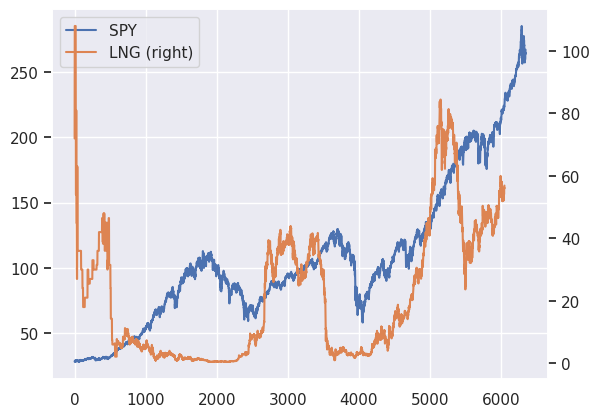

<Figure size 640x480 with 0 Axes>

In [9]:
# Plot the Adj_Close columns for SPY and LNG
spy_df['Adj_Close'].plot(label='SPY', legend=True)
lng_df['Adj_Close'].plot(label='LNG', legend=True, secondary_y=True)
plt.show()  # show the plot
plt.clf()  # clear the plot space

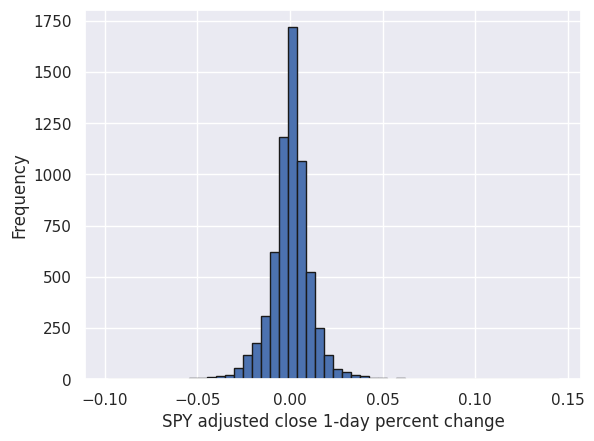

In [10]:
# Histogram of the daily price change percent of Adj_Close for LNG
spy_df['Adj_Close'].pct_change().plot.hist(bins=50, edgecolor="k")
#plt.xlim(-0.1, 0.1)
plt.xlabel('SPY adjusted close 1-day percent change')
#plt.ylabel('No of times')
plt.show()

#### Prepare Data to match DataCamp data set:

Index has to be the col `'Date'`and the format of the index has to be `DatatimeIndex`.

Raw data has more than 5000 rows. In the exercise only 500

The data has to start the `2016-04-15`. Drop the rest.

In [11]:
#lng_df['Date'] = pd.to_datetime(lng_df['Date']).dt.date
lng_df.set_index('Date',inplace=True)
lng_df.index =pd.DatetimeIndex(lng_df.index)

In [12]:
print(lng_df.loc['1994-04-04':'2016-04-14'].shape)

(5548, 2)


The data starts now the `2016-04-15`.

And finish the `2018-04-10`

I have to **delete more data** from `lng_df`.

In [13]:
lng_df.drop(lng_df.index[lng_df.index<'2016-04-15'], inplace=True)

In [14]:
lng_df.drop(lng_df.index[lng_df.index>'2018-04-10'], inplace=True)

In [15]:
lng_df.shape

(500, 2)

#### Histogram

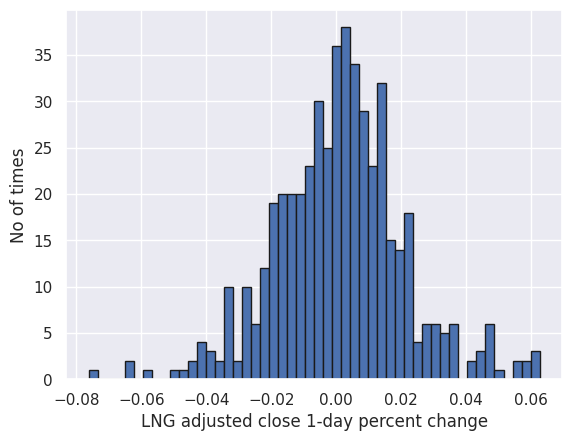

In [16]:
# Histogram of the daily price change percent of Adj_Close for LNG
lng_df['Adj_Close'].pct_change().plot.hist(bins=50, edgecolor="k")
#plt.xlim(-0.1, 0.2)
plt.xlabel('LNG adjusted close 1-day percent change')
plt.ylabel('No of times')
plt.show()

## Correlations

Correlations are nice to check out before building machine learning models, because we can see which features correlate to the target most strongly.

**Pearson's correlation coefficient** is often used, which only detects linear relationships.

It's commonly *assumed our data is normally distributed*, which we can "eyeball" from histograms.

Highly correlated variables have a Pearson correlation coefficient near 1 (positively correlated) or -1 (negatively correlated). A value near 0 means the two variables are not linearly correlated.

If we use the same time periods for previous price changes and future price changes, we can see if the stock price is mean-reverting (bounces around) or trend-following (goes up if it has been going up recently).

### Instructions

* Using the `lng_df` DataFrame and its `Adj_Close`:

* Create the 5-day future price (as `5d_future_close`) with pandas' `.shift(-5)`.

* Use `pct_change(5`) on `5d_future_close` and `Adj_Close` to create the future 5-day % price change (`5d_close_future_pct`), and the current 5-day % price change (`5d_close_pct`).

* Examine correlations between the two 5-day percent price change columns with `.corr()` on `lng_df`.

* Using `plt.scatter()`, make a scatterplot of `5d_close_pct` vs `5d_close_future_pct`.

In [17]:
lng_df.shape

(500, 2)

                     5d_close_pct  5d_close_future_pct
5d_close_pct             1.000000            -0.164861
5d_close_future_pct     -0.164861             1.000000


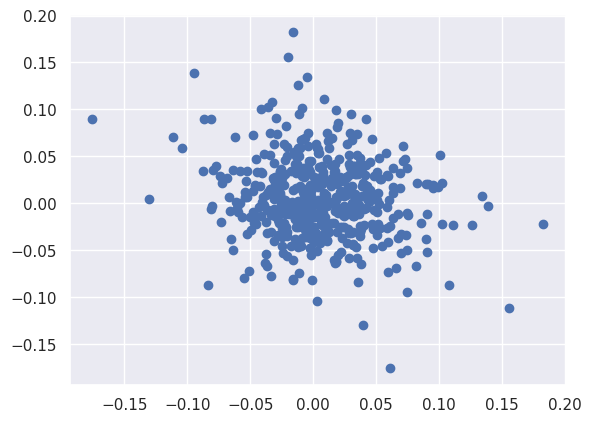

In [18]:
# Create 5-day % changes of Adj_Close for the current day, and 5 days in the future
lng_df['5d_future_close'] = lng_df['Adj_Close'].shift(-5)
lng_df['5d_close_future_pct'] = lng_df['5d_future_close'].pct_change(5)
lng_df['5d_close_pct'] = lng_df['Adj_Close'].pct_change(5)

# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = lng_df[['5d_close_pct', '5d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.scatter(lng_df['5d_close_pct'], lng_df['5d_close_future_pct'])
plt.show()

We can see the 5-day change is slightly negatively correlated to the change in the last 5 days -- an example of overall mean reversion!

## Data transforms, features, and targets

### Create moving average and RSI features

We want to add historical data to our machine learning models to make better predictions, but adding lots of historical time steps is tricky. Instead, we can condense information from previous points into a single timestep with indicators.

A **moving average** is one of the simplest indicators - it's the average of previous data points. This is the function `talib.SMA()` from the `TAlib` library.

Another common technical indicator is the **relative strength index (RSI)**. This is defined by:


$$RSI=100−\frac{100}{1+RS}$$



$$RS=\frac{average\:gain\:over\:n\:periods}{average\:loss\:over\:n\:periods}$$

The n periods is set in `talib.RSI()` as the timeperiod argument.

#### Instructions

* Create a list of feature names (start with a list containing only `'5d_close_pct'`).

* Use timeperiods of 14, 30, 50, and 200 to calculate moving averages with `talib.SMA()` from adjusted close prices (`lng_df['Adj_Close']`).

* Normalize the moving averages with the adjusted close by dividing by `Adj_Close`.

* Within the loop, calculate RSI with `talib.RSI()` from `Adj_Close` and using n for the timeperiod.


In [19]:
import talib

In [20]:
feature_names = ['5d_close_pct']  # a list of the feature names for later

# Create moving averages and rsi for timeperiods of 14, 30, 50, and 200
for n in [14,30,50,200]:

    # Create the moving average indicator and divide by Adj_Close
    lng_df['ma' + str(n)] = talib.SMA(lng_df['Adj_Close'].values,
                              timeperiod=n) / lng_df['Adj_Close']
    # Create the RSI indicator
    lng_df['rsi' + str(n)] = talib.RSI(lng_df['Adj_Close'].values, timeperiod=n)

    # Add rsi and moving average to the feature name list
    feature_names = feature_names + ['ma' + str(n), 'rsi' + str(n)]

print(feature_names)

['5d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50', 'ma200', 'rsi200']


In [21]:
print(lng_df.columns)
lng_df.shape

Index(['Adj_Close', 'Adj_Volume', '5d_future_close', '5d_close_future_pct',
       '5d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50',
       'ma200', 'rsi200'],
      dtype='object')


(500, 13)

### Create features and targets

We almost have features and targets that are machine-learning ready -- we have features from current price changes (`5d_close_pct`) and indicators (moving averages and RSI), and we created targets of future price changes (`5d_close_future_pct`). Now we need to break these up into separate numpy arrays so we can feed them into machine learning algorithms.

Our indicators also cause us to have missing values at the beginning of the DataFrame due to the calculations. We could backfill this data, fill it with a single value, or drop the rows. Dropping the rows is a good choice, so our machine learning algorithms aren't confused by any sort of backfilled or 0-filled data. Pandas has a `.dropna()` function which we will use to drop any rows with missing values.

#### Drop `lng_df` NaN values

In [22]:
# Drop all na values
lng_df1=lng_df.dropna()
features = lng_df1[feature_names]
print(features.columns)
print(features.shape)

targets = lng_df1['5d_close_future_pct']

# Create DataFrame from target column and feature columns
feature_and_target_cols = ['5d_close_future_pct'] + feature_names
feat_targ_df = lng_df1[feature_and_target_cols]

# Calculate correlation matrix
corr = feat_targ_df.corr()
print(corr)

Index(['5d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50',
       'ma200', 'rsi200'],
      dtype='object')
(295, 9)
                     5d_close_future_pct  5d_close_pct      ma14     rsi14  \
5d_close_future_pct             1.000000     -0.047183  0.096373 -0.068888   
5d_close_pct                   -0.047183      1.000000 -0.827699  0.683973   
ma14                            0.096373     -0.827699  1.000000 -0.877566   
rsi14                          -0.068888      0.683973 -0.877566  1.000000   
ma30                            0.102744     -0.609573  0.848778 -0.964795   
rsi30                          -0.106279      0.518748 -0.713427  0.935711   
ma50                            0.113444     -0.475081  0.692689 -0.916540   
rsi50                          -0.138946      0.426045 -0.601849  0.845788   
ma200                           0.230860     -0.220690  0.346457 -0.551087   
rsi200                         -0.221029      0.284021 -0.416221  0.639057   

         

Now we've got features and targets ready for machine learning!

### Check the correlations

Before we fit our first machine learning model, let's look at the correlations between features and targets. Ideally we want large (near 1 or -1) correlations between features and targets. Examining correlations can help us tweak features to maximize correlation (for example, altering the timeperiod argument in the talib functions). It can also help us remove features that aren't correlated to the target.

To easily plot a correlation matrix, we can use seaborn's `heatmap()` function. This takes a correlation matrix as the first argument, and has many other options (https://seaborn.pydata.org/generated/seaborn.heatmap.html). Check out the annot option -- this will help us turn on annotations.

#### Instructions

* Plot a heatmap of the correlation matrix (`corr`) we calculated in the last exercise (`seaborn` has been imported as sns for you).
* Turn annotations on using the `sns.heatmap(`) option `annot=True`.
* Show the plot with `plt.show()`, and clear the plot area with `plt.clf()` to prepare for our second plot.
* Create a scatter plot of the most correlated feature/variable with the target (`5d_close_future_pc`t) from the `lng_df` DataFrame.

In [23]:
import seaborn as sns
sns.set_style("whitegrid")

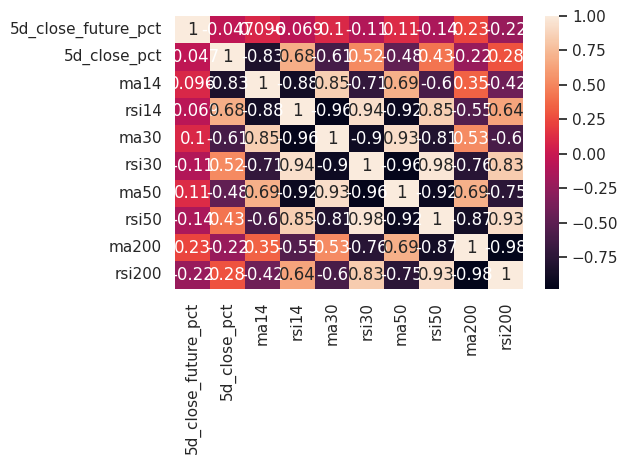

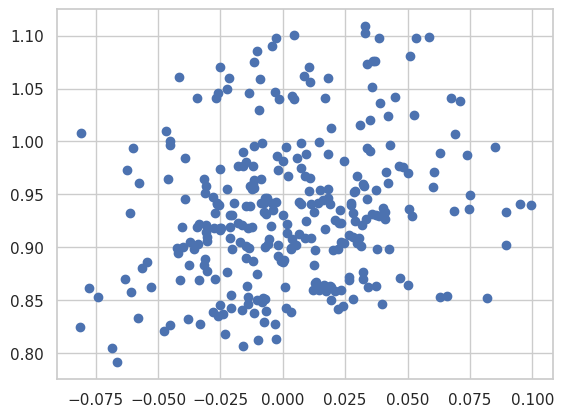

In [24]:
# Plot heatmap of correlation matrix
sns.heatmap(corr, annot=True)
plt.yticks(rotation=0); plt.xticks(rotation=90)  # fix ticklabel directions
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()  # show the plot

plt.clf()  # clear the plot area

# Create a scatter plot of the most highly correlated variable with the target
plt.scatter(lng_df['5d_close_future_pct'], lng_df['ma200'])
plt.show()

We can see a few features have some correlation to the target!

## Linear modeling

### Create train and test features

Before we fit our linear model, we want to add a constant to our features, so we have an intercept for our linear model.

We also want to create `train` and `test` features. This is so we can fit our model to the train dataset, and evaluate performance on the test dataset. We always want to check performance on data the model has not seen to make sure we're not overfitting, which is memorizing patterns in the training data too exactly.

With a time series like this, we typically want to **use the oldest data as our training set**, and **the newest data as our test set**. This is so we can evaluate the performance of the model on the most recent data, which will more realistically simulate predictions on data we haven't seen yet.

#### Instructions

* Import the `statsmodels.api` library with the alias `sm`.
* Add a constant to the features variable using statsmodels' `.add_constant()` function.
* Set train_size as 85% of the total number of datapoints (number of rows) using the `.shape[0]` property of features or targets.
* Break up linear_features and targets into `train` and `test` sets using `train_size` and `Python indexing` (e.g. `[start:stop:step]`).

In [25]:
# Import the statsmodels.api library with the alias sm
import statsmodels.api as sm

# Add a constant to the features
linear_features = sm.add_constant(features)

# Create a size for the training set that is 85% of the total number of samples
train_size = int(0.85 * features.shape[0])
train_features = linear_features[0:train_size]
train_targets = targets[0:train_size]
test_features = linear_features[train_size:]
test_targets = targets[train_size:]
print(linear_features.shape, train_features.shape, test_features.shape)
print(train_targets.shape, test_targets.shape)

(295, 10) (250, 10) (45, 10)
(250,) (45,)


We're ready to fit our linear model.

### Fit a linear model

We'll now fit a linear model, because they are simple and easy to understand.

Once we've fit our model, we can see which predictor variables appear to be meaningfully linearly correlated with the target, as well as their magnitude of effect on the target.

Our judgment of whether or not predictors are significant is based on the **p-values** of coefficients. This is using a t-test to statistically test if the coefficient significantly differs from 0.

The **p-value** *is the percent chance that the coefficient for a feature does not differ from zero*.

Typically, we take a p-value of less than 0.05 to mean the coefficient is significantly different from 0.

#### Instructions

* Fit the linear model (using the `.fit()` method) and save the results in the results variable.
* Print out the results summary with the `.summary()` function.
* Print out the p-values from the results (the `.pvalues` property of results).
* Make predictions from the `train_features` and `test_features` using the `.predict()` function of our results object.

In [26]:
# Create the linear model and complete the least squares fit
model = sm.OLS(train_targets, train_features)
results = model.fit() # fit the model
print(results.summary())

# examine pvalues
# Features with p <= 0.05 are typically considered significantly different from 0
print(results.pvalues)

                             OLS Regression Results                            
Dep. Variable:     5d_close_future_pct   R-squared:                       0.273
Model:                             OLS   Adj. R-squared:                  0.246
Method:                  Least Squares   F-statistic:                     10.01
Date:                 Sun, 22 Dec 2024   Prob (F-statistic):           4.92e-13
Time:                         15:58:10   Log-Likelihood:                 536.49
No. Observations:                  250   AIC:                            -1053.
Df Residuals:                      240   BIC:                            -1018.
Df Model:                            9                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.8197      1.169    

In [27]:
print(train_features.shape, test_features.shape)
print(train_targets.shape, test_targets.shape)

(250, 10) (45, 10)
(250,) (45,)


In [28]:
# Make predictions from our model for train and test sets
train_predictions = results.predict(train_features)
test_predictions = results.predict(test_features)

print(train_features.shape, train_targets.shape, train_predictions.shape)
print(test_features.shape,test_targets.shape, test_predictions.shape )

(250, 10) (250,) (250,)
(45, 10) (45,) (45,)


Now we can evaluate the results from our predictions.

### Evaluate our results

Once we have our linear fit and predictions, we want to see how good the predictions are so we can decide if our model is any good or not. Ideally, we want to back-test any type of trading strategy. However, this is a complex and typically time-consuming experience.

A quicker way to understand the performance of our model is looking at regression evaluation metrics like **`R2`**, and plotting the predictions versus the actual values of the targets.

Perfect predictions would form a straight, diagonal line in such a plot, making it easy for us to eyeball how our predictions are doing in different regions of price changes.

We can use matplotlib's `.scatter()` function to create scatter plots of the predictions and actual values.

#### Instructions

* Show `test_predictions` vs `test_targets` in a scatterplot, with 80% transparency for the points (use the alpha parameter to set transparency).
* Plot the perfect prediction line using `np.arange()` and the minimum and maximum values from the xaxis `(xmin, xmax)`.
* Display the legend on the plot with `plt.legend()``
.

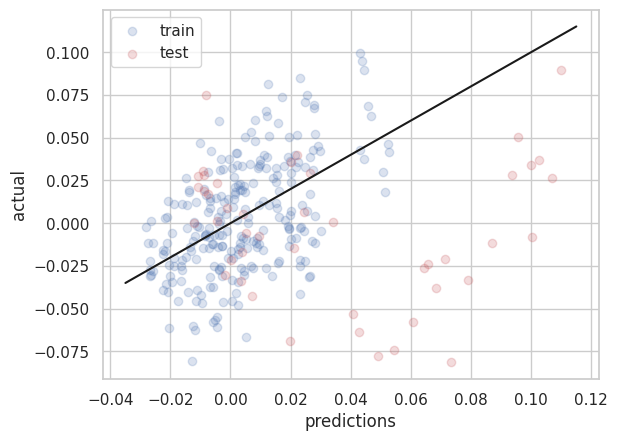

In [29]:
# Scatter the predictions vs the targets with 80% transparency
plt.scatter(train_predictions, train_targets, alpha=0.2, color='b', label='train')

plt.scatter(test_predictions, test_targets, alpha=0.2, color='r', label='test')

# Plot the perfect prediction line
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')

# Set the axis labels and show the plot
plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend() # show the legend
plt.show()

# Chap 2: Machine learning tree methods


Learn how to use tree-based machine learning models to predict future values of a stock's price, as well as how to use forest-based machine learning methods for regression and feature selection.


* Theory: **Engineering more features**

* Feature engineering from volume

* Create day-of-week features

* Examine correlations of the new features

* Theory: **Decision trees**

* Fit a decision tree

* Try different max depths

* Check our results

* Theory: **Random forests**

* Fit a random forest

* Tune random forest hyperparameters

* Evaluate performance

* Theory: **Feature importances and gradient boosting**

* Random forest feature importances

* A gradient boosting model

* Gradient boosting feature importances

## Engineering more features

### Feature engineering from volume

We're going to use non-linear models to make more accurate predictions.

With linear models, features must be linearly correlated to the target.

Other machine learning models can combine features in non-linear ways. For example, what if the price goes up when the moving average of price is going up, and the moving average of volume is going down?

The only way to capture those interactions is to either multiply the features, or to use a machine learning algorithm that can handle non-linearity (e.g. random forests).

To incorporate more information that may interact with other features, we can add in weakly-correlated features. First we will add volume data, which we have in the `lng_df` as the `Adj_Volume` column.

#### Instructions

* Create a 1-day percent change in volume (use `pct_change()` from pandas), and assign it to the `Adj_Volume_1d_change` column in `lng_df`.
* Create a 5-day moving average of the 1-day percent change in Volume, and assign it to the `Adj_Volume_1d_change_SMA` column in `lng_df`.
* Plot histograms of these two new features we created using the `new_features` list.

In [30]:
print(lng_df.shape)
print(lng_df1.shape)
print(lng_df.columns)
print(lng_df1.columns)

(500, 13)
(295, 13)
Index(['Adj_Close', 'Adj_Volume', '5d_future_close', '5d_close_future_pct',
       '5d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50',
       'ma200', 'rsi200'],
      dtype='object')
Index(['Adj_Close', 'Adj_Volume', '5d_future_close', '5d_close_future_pct',
       '5d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50',
       'ma200', 'rsi200'],
      dtype='object')


My file is much larger than the one used in the course I drop all data untill the `2016-04-15`

In [31]:
# Create 2 new volume features, 1-day % change and 5-day SMA of the % change
new_features = ['Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA']
feature_names.extend(new_features)
lng_df['Adj_Volume_1d_change'] = lng_df['Adj_Volume'].pct_change()
lng_df['Adj_Volume_1d_change_SMA'] = talib.SMA(lng_df['Adj_Volume_1d_change'].
                                               values,timeperiod=5)

In [32]:
print(lng_df.shape)

(500, 15)


In [33]:
# Create 2 new volume features, 1-day % change and 5-day SMA of the % change
lng_df1['Adj_Volume_1d_change'] = lng_df1['Adj_Volume'].pct_change()
lng_df1['Adj_Volume_1d_change_SMA'] = talib.SMA(lng_df1['Adj_Volume_1d_change'].
                                                values,timeperiod=5)

In [34]:
print(lng_df1.shape)

(295, 15)


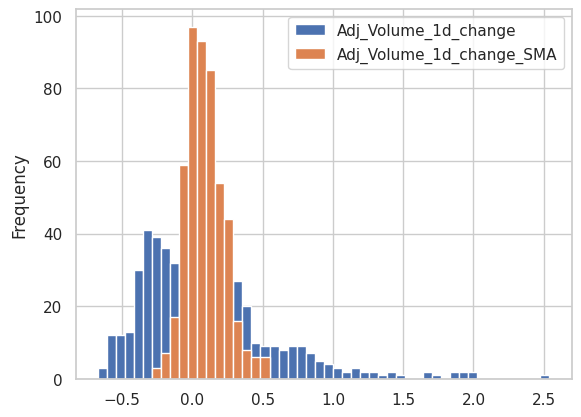

In [35]:
# Plot histogram of volume % change data
lng_df[new_features].plot(kind='hist', sharex=False, bins=50)
plt.show()

 We can see the moving average of volume changes has a much smaller range than the raw data.

### Create day-of-week features

We can engineer datetime features to add even more information for our non-linear models.

Most financial data has datetimes, which have lots of information in them -- year, month, day, and sometimes hour, minute, and second. But we can also get the day of the week, and things like the quarter of the year, or the elapsed time since some event (e.g. earnings reports).

We are only going to get the day of the week here, since our dataset doesn't go back very far in time.

The dayofweek property from the pandas datetime index will help us get the day of the week.

Then we will dummy dayofweek with pandas' `get_dummies()`. This creates columns for each day of the week with binary values (`0` or `1`). We drop the first column because it can be inferred from the others.

#### Instructions

* Use the `dayofweek` property from the `lng_df` index to get the days of the week.
* Use the `get_dummies` function on the days of the week variable, giving it a prefix of `'weekday'`.
* Set the index of the `days_of_week` variable to be the same as the `lng_df` index so we can merge the two.
* Concatenate the `lng_df` and `days_of_week` DataFrames into one DataFrame.

In [36]:
days_of_week.head()

NameError: name 'days_of_week' is not defined

In [37]:
# Use pandas' get_dummies function to get dummies for day of the week
days_of_week = pd.get_dummies(lng_df.index.dayofweek,
                              prefix='weekday',
                              drop_first=True)

# Set the index as the original dataframe index for merging
days_of_week.index = lng_df.index

# Join the dataframe with the days of week dataframe
lng_df = pd.concat([lng_df, days_of_week], axis=1)

# Add days of week to feature names
feature_names.extend(['weekday_' + str(i) for i in range(1, 5)])
lng_df.dropna(inplace=True)  # drop missing values in-place
print(lng_df.head())


            Adj_Close  Adj_Volume  5d_future_close  5d_close_future_pct  \
Date                                                                      
2017-01-31      47.65   2137394.0            47.81             0.003358   
2017-02-01      47.10   2051631.0            48.01             0.019321   
2017-02-02      49.33   3081369.0            49.19            -0.002838   
2017-02-03      49.43   4158130.0            48.93            -0.010115   
2017-02-06      48.50   2090909.0            48.14            -0.007423   

            5d_close_pct      ma14      rsi14      ma30      rsi30      ma50  \
Date                                                                           
2017-01-31      0.043812  0.950697  62.968946  0.918657  60.655749  0.895731   
2017-02-01     -0.023429  0.967486  60.156019  0.932427  59.159791  0.910110   
2017-02-02     -0.021618  0.932220  66.659314  0.895486  62.988478  0.873379   
2017-02-03      0.007336  0.938976  66.920059  0.899461  63.148741  0.8754

In [38]:
days_of_week1 = pd.get_dummies(lng_df1.index.dayofweek,
                              prefix='weekday',
                              drop_first=True)

# Set the index as the original dataframe index for merging
days_of_week1.index = lng_df1.index

# Join the dataframe with the days of week dataframe
lng_df1 = pd.concat([lng_df1, days_of_week1], axis=1)

# Add days of week to feature names

lng_df1.dropna(inplace=True)  # drop missing values in-place
print(lng_df1.head())

            Adj_Close  Adj_Volume  5d_future_close  5d_close_future_pct  \
Date                                                                      
2017-02-07      47.81   2522644.0            47.88             0.001464   
2017-02-08      48.01   1521339.0            47.69            -0.006665   
2017-02-09      49.19   1717838.0            46.84            -0.047774   
2017-02-10      48.93   1747989.0            46.71            -0.045371   
2017-02-13      48.14   2321977.0            47.36            -0.016203   

            5d_close_pct      ma14      rsi14      ma30      rsi30      ma50  \
Date                                                                           
2017-02-07      0.003358  0.985448  58.654992  0.939476  58.817869  0.911801   
2017-02-08      0.019321  0.989333  59.351015  0.940047  59.182360  0.911289   
2017-02-09     -0.002838  0.974211  63.278848  0.922383  61.274321  0.893214   
2017-02-10     -0.010115  0.987957  61.860468  0.931821  60.566775  0.9020

`weekday_1=Tue, weekday_2=Wed, weekday_3=Thu, weekday_4=Fri` .

If not Tu, We, Thu, Fr, then is Monday

Good work engineering new features! Let's see how they correlate to the target.

### Examine correlations of the new features

Now that we have our volume and datetime features, we want to check the correlations between our new features (stored in the new_features list) and the target (`5d_close_future_pct`) to see how strongly they are related. Recall pandas has the built-in `.corr()` method for DataFrames, and `seaborn` has a nice `heatmap()` function to show the correlations.

#### Instructions

* Extend our new_features variable to contain the weekdays' column names, such as `weekday_1`, by concatenating the weekday number with the `'weekday_'` string.
* Use `seaborn`'s `heatmap` to plot the correlations of `new_features` and the target, `5d_close_future_pct`.

['Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4']


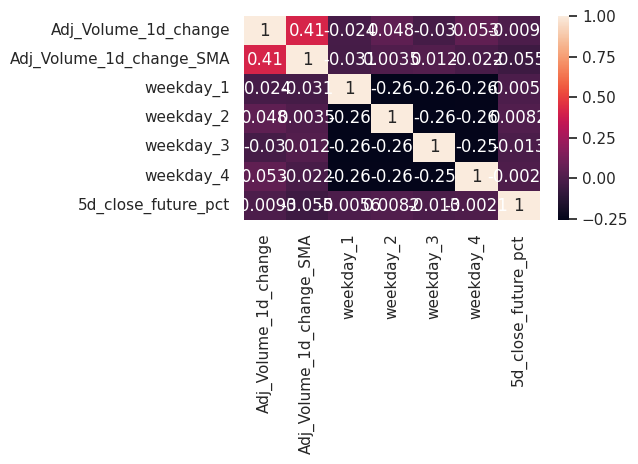

In [39]:
# Add the weekday labels to the new_features list
new_features.extend(['weekday_' + str(i) for i in range(1, 5)])
print(new_features)
# Plot the correlations between the new features and the targets
sns.heatmap(lng_df[new_features + ['5d_close_future_pct']].corr(), annot=True)
plt.yticks(rotation=0)  # ensure y-axis ticklabels are horizontal
plt.xticks(rotation=90)  # ensure x-axis ticklabels are vertical
plt.tight_layout()
plt.show()

Even though the correlations are weak, they may improve our predictions via interactions with other features.

## Decision trees

### Fit a decision tree

Random forests are a go-to model for predictions; they work well out of the box. But we'll first learn the building block of random forests -- decision trees.

Decision trees split the data into groups based on the features. Decision trees start with a root node, and split the data down until we reach leaf nodes.

We can use `sklearn` to fit a decision tree with `DecisionTreeRegressor` and `.fit(features, targets)`.

Without limiting the tree's depth (or height), it will keep splitting the data until each leaf has 1 sample in it, which is the epitome of overfitting. We'll learn more about overfitting in the coming chapters.

#### Instructions

* Use the imported class `DecisionTreeRegressor` with default arguments (i.e. no arguments) to create a decision tree model called `decision_tree`.
* Fit the model using `train_features` and `train_targets` which we've created earlier (and now contain day-of-week and volume features).
* Print the score on the training features and targets, as well as `test_features` and `test_targets`.


In [40]:
print(lng_df.shape)
print(lng_df.columns)
print(lng_df1.shape)
print(lng_df1.columns)

(295, 19)
Index(['Adj_Close', 'Adj_Volume', '5d_future_close', '5d_close_future_pct',
       '5d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50',
       'ma200', 'rsi200', 'Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4'],
      dtype='object')
(290, 19)
Index(['Adj_Close', 'Adj_Volume', '5d_future_close', '5d_close_future_pct',
       '5d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50',
       'ma200', 'rsi200', 'Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4'],
      dtype='object')


In [41]:
feature_names_tree=lng_df.columns
feature_names_tree=['5d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50',
       'ma200', 'rsi200', 'Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4']
lng_df_3=lng_df[feature_names_tree]
lng_df_3.columns

Index(['5d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50',
       'ma200', 'rsi200', 'Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4'],
      dtype='object')

In [42]:
train_size = int(0.85 * lng_df_3.shape[0])
train_features_3=lng_df_3[0:train_size]
print(train_features_3.shape)
test_features_3=lng_df_3[train_size:]
print(test_features_3.shape)

# Targets
train_targets_3 = targets[0:train_size]
test_targets_3 = targets[train_size:]
print(train_targets_3.shape)
print(test_targets_3.shape)

(250, 15)
(45, 15)
(250,)
(45,)


In [43]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree = DecisionTreeRegressor()

# Fit the model to the training features and targets
decision_tree.fit(train_features_3,train_targets_3)

# Check the score on train and test
print(decision_tree.score(train_features_3, train_targets_3))
print(decision_tree.score(test_features_3,test_targets_3))

1.0
-1.3800953890956063


A perfect fit! ...on the training data.

### Try different max depths

We always want to optimize our machine learning models to make the best predictions possible. We can do this by **tuning hyperparameters**, which are settings for our models.

We will see in more detail how these are useful in future chapters, but for now think of them as knobs we can turn to tune our predictions to be as good as possible.

For regular decision trees, probably the most important hyperparameter is `max_depth`. This limits the number of splits in a decision tree.

Let's find the best value of `max_depth` based on the `R2` score of our model on the test set, which we can obtain using the `score()` method of our decision tree models.

#### Instructions

* Loop through the values 3, 5, and 10 for use as the `max_depth` parameter in our decision tree model.
* Set the `max_depth` parameter in our `DecisionTreeRegressor` to be equal to `d` in each loop iteration.
* Print the model's score on the `train_features` and `train_targets`.

In [44]:
# Loop through a few different max depths and check the performance
for d in [3,5,10]:
    # Create the tree and fit it
    decision_tree = DecisionTreeRegressor(max_depth=d)
    decision_tree.fit(train_features_3, train_targets_3)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree.score(train_features_3, train_targets_3))
    print(decision_tree.score(test_features_3, test_targets_3), '\n')

max_depth= 3
0.313332035717818
-0.30706922103784007 

max_depth= 5
0.5117261722974892
-1.0358090326169318 

max_depth= 10
0.8989892189602487
-1.4635978276715678 



 Remember what value of max_depth got the highest test score for the next exercise!

### Check our results

Once we have an optimized model, we want to check how it is performing in more detail. We already saw the R2 score, but it can be helpful to see the predictions plotted vs actual values. We can use the `.predict()` method of our decision tree model to get predictions on the train and test sets.

Ideally, we want to see diagonal lines from the lower left to the upper right. However, due to the simplicity of decisions trees, our model is not going to do well on the test set. But it will do well on the train set.

#### Instructions

* Create a `DecisionTreeRegressor` model called `decision_tree` using 3 for the `max_depth` hyperparameter.
* Make predictions on the train and test sets (`train_features` and `test_features`) with our decision tree model.
* Scatter the train and test predictions vs the actual target values with `plt.scatter()`, and set the label argument equal to test for the test set.

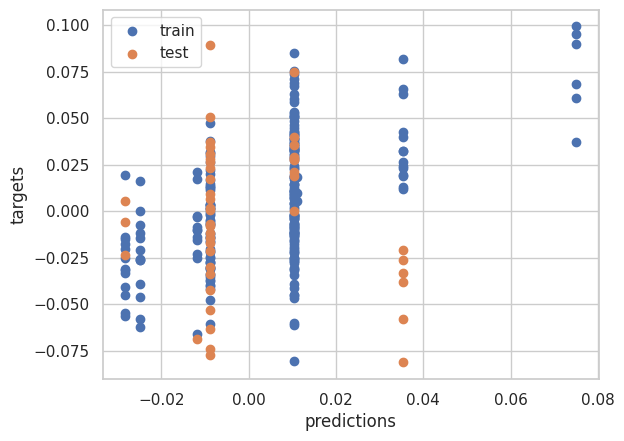

In [45]:
# Use the best max_depth of 3 from last exercise to fit a decision tree
decision_tree = DecisionTreeRegressor(max_depth=3)
decision_tree.fit(train_features_3, train_targets_3)

# Predict values for train and test
train_predictions_3 = decision_tree.predict(train_features_3)
test_predictions_3 = decision_tree.predict(test_features_3)

# Scatter the predictions vs actual values
plt.scatter(train_predictions_3, train_targets_3, label='train')
plt.scatter(test_predictions_3, test_targets_3, label='test')
plt.legend()
plt.xlabel('predictions')
plt.ylabel('targets')
plt.show()

The predictions group into lines because our depth is limited.

## Random forests

### Fit a random forest

Data scientists often use random forest models. They perform well out of the box, and have lots of settings to optimize performance. **Random forests can be used for classification or regression; we'll use it for regression** to predict the future price change of LNG.

We'll create and fit the random forest model similarly to the decision trees using the `.fit(features, targets)` method. With sklearn's `RandomForestRegressor`, there's a built-in `.score()` method we can use to evaluate performance. This takes arguments `(features, targets)`, and returns the `R2` score (the coefficient of determination).

#### Instructions

* Create the random forest model with the imported `RandomForestRegressor` class.
* Fit (train) the random forest using `train_features` and `train_targets`.
* Print out the R2 score on the train and test sets.

In [46]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
# Create the random forest model and fit to the training data
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(train_features_3, train_targets_3)

# Look at the R^2 scores on train and test
print(rfr.score(train_features_3, train_targets_3))
print(rfr.score(test_features_3, test_targets_3))

0.9081899930001174
-0.076183905226608


### Tune random forest hyperparameters

As with all models, we want to optimize performance by tuning hyperparameters.

We have many hyperparameters for random forests, but **the most important is often the number of features we sample at each split**, or **`max_features`** in `RandomForestRegressor` from the `sklearn` library.

For models like random forests that have randomness built-in, we also want to set the `random_state`. This is set for our results to be reproducible.

Usually, we can use sklearn's `GridSearchCV()` method to search hyperparameters, but with a financial time series, we don't want to do cross-validation due to data mixing.

We want to fit our models on the oldest data and evaluate on the newest data. So we'll use sklearn's `ParameterGrid` to create combinations of hyperparameters to search.

#### Instructions

* Set the `n_estimators` hyperparameter to be a list with one value (200) in the grid dictionary.
* Set the `max_features` hyperparameter to be a list containing `4` and `8` in the grid dictionary.
* Fit the random forest regressor model (`rfr`, already created for you) to the `train_features` and `train_targets` with each combination of hyperparameters, g, in the loop.
* Calculate `R2` by using `rfr.score()` on test_features and append the result to the `test_scores` list.

In [48]:
from sklearn.model_selection import ParameterGrid

In [49]:
#Instantiate RandomForestRegressor
rfr = RandomForestRegressor()

# Create a dictionary of hyperparameters to search
grid = {'n_estimators':[200], 'max_depth': [3], 'max_features': [4,6,8], 'random_state': [42]}
test_scores = []

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    rfr.set_params(**g)  # ** is "unpacking" the dictionary
    rfr.fit(train_features_3, train_targets_3)
    test_scores.append(rfr.score(test_features_3, test_targets_3))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])

0.0473317042742849 {'random_state': 42, 'n_estimators': 200, 'max_features': 4, 'max_depth': 3}


 Our test score (R^2) isn't great, but it's > 0!

### Evaluate performance

Lastly, and as always, we want to evaluate performance of our best model to check how well or poorly we are doing. Ideally it's best to do back-testing, but that's an involved process we don't have room to cover in this course.

We've already seen the R2 scores, but let's take a look at the scatter plot of predictions vs actual results using matplotlib. Perfect predictions would be a diagonal line from the lower left to the upper right.

#### Instructions

* Use the best number for `max_features` in our `RandomForestRegressor` (`rfr`) that we found in the previous exercise (it was `4`).
* Make predictions using the model with the `train_features` and `test_features`.
* Scatter actual targets (train/test_targets) vs the predictions (train/test_predictions), and label the datasets train and test.

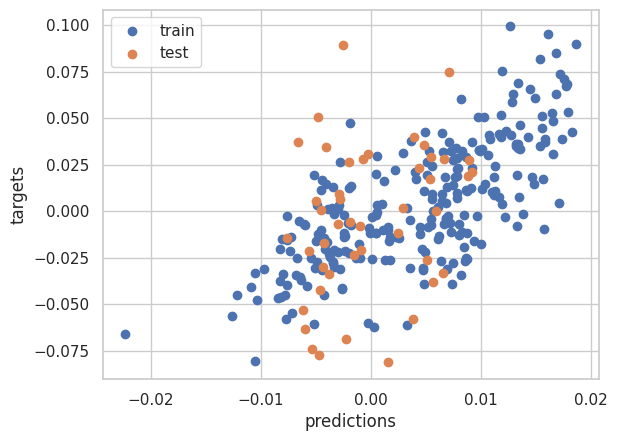

In [50]:
# Use the best hyperparameters from before to fit a random forest model
rfr = RandomForestRegressor(n_estimators=200, max_depth=3, max_features=4, random_state=42)
rfr.fit(train_features_3, train_targets_3)

# Make predictions with our model
train_predictions_3 = rfr.predict(train_features_3)
test_predictions_3 = rfr.predict(test_features_3)

# Create a scatter plot with train and test actual vs predictions
plt.scatter(train_predictions_3, train_targets_3, label='train')
plt.scatter(test_predictions_3,test_targets_3,label='test')
#plt.xlim(-0.075, 0.1)
plt.legend()
plt.xlabel('predictions')
plt.ylabel('targets')
plt.show()

## Feature importances and gradient boosting

### Random forest feature importances

One useful aspect of tree-based methods is the ability to extract feature importances. This is a quantitative way to measure how much each feature contributes to our predictions. It can help us focus on our best features, possibly enhancing or tuning them, and can also help us get rid of useless features that may be cluttering up our model.

Tree models in `sklearn` have a `.feature_importances_ property` that's accessible after fitting the model. This stores the feature importance scores. We need to get the indices of the sorted feature importances using `np.argsort()` in order to make a nice-looking bar plot of feature importances (sorted from greatest to least importance).

#### Instructions

* Use the `feature_importances_` property of our random forest model (`rfr`) to extract feature importances into the importances variable.
* Use numpy's `argsort` to get indices of the feature importances from greatest to least, and save the sorted indices in the sorted_index variable.
* Set `xtick` labels to be feature names in the `labels` variable, using the `sorted_index `list. `feature_names` must be converted to a numpy array so we can index it with the `sorted_index` list.

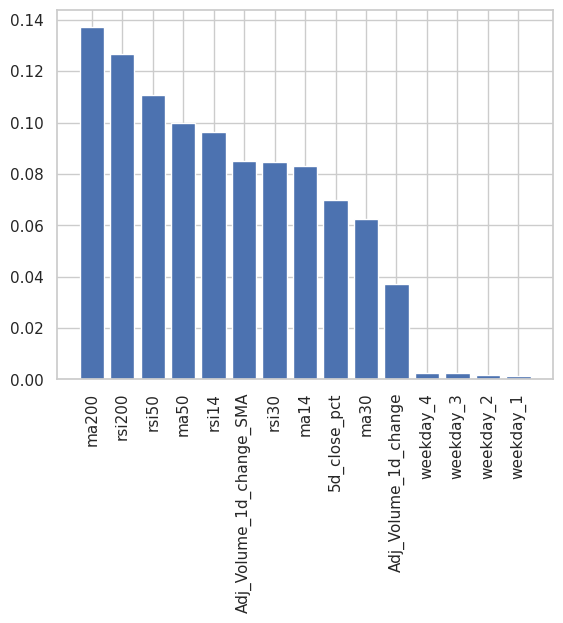

In [51]:
# Get feature importances from our random forest model
importances = rfr.feature_importances_

# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))

# Create tick labels
labels = np.array(feature_names)[sorted_index]
plt.bar(x, importances[sorted_index], tick_label=labels)

# Rotate tick labels to vertical
plt.xticks(rotation=90)
plt.show()

Unsurprisingly, it looks like the days of the week should be thrown out.

### A gradient boosting model

Now we'll fit a **gradient boosting (GB) model**. It's been said (http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/)a linear model is like a Toyota Camry, and GB is like a Black Hawk helicopter. GB has potential to outperform random forests, but doesn't always do so. This is called the **no free lunch theorem** (https://en.wikipedia.org/wiki/No_free_lunch_theorem), meaning we should always try lots of different models for each problem.

**GB is similar to random forest models, but the difference is that trees are built successively**. With each iteration, the next tree fits the residual errors from the previous tree in order to improve the fit.

For now we won't search our hyperparameters -- they've been searched for you.

#### Instructions

* Create a `GradientBoostingRegressor` object with the hyperparameters that have already been set for you.
* Fit the `gbr` model to the `train_features` and `train_targets`.
* Print the scores for the `training` and `test` `features` and `targets`.

In [52]:
from sklearn.ensemble import GradientBoostingRegressor

# Create GB model -- hyperparameters have already been searched for you
gbr = GradientBoostingRegressor(max_features=4,
                                learning_rate=0.01,
                                n_estimators=200,
                                subsample=0.6,
                                random_state=42)
gbr.fit(train_features_3,train_targets_3)

print(gbr.score(train_features_3, train_targets_3))
print(gbr.score(test_features_3, test_targets_3))

0.40765658572761587
0.03655855607216019


 In this case the gradient boosting model isn't that much better than a random forest, but you know what they say -- no free lunch!

### Gradient boosting feature importances

As with random forests, we can extract feature importances from gradient boosting models to understand which features are the best predictors. Sometimes it's nice to try different tree-based models and look at the feature importances from all of them. This can help average out any peculiarities that may arise from one particular model.

The feature importances are stored as a numpy array in the `.feature_importances_` property of the gradient boosting model. We'll need to get the sorted indices of the feature importances, using `np.argsort()`, in order to make a nice plot. We want the features from largest to smallest, so we will use Python's indexing to reverse the sorted importances like `feat_importances[::-1]`.

#### Instructions

* Reverse the `sorted_index` variable to go from greatest to least using python indexing.
* Create the sorted feature `labels` list as labels by converting `feature_names` to a numpy array and indexing with `sorted_index`.
* Create a bar plot of the `xticks`, and `feature_importances` indexed with the `sorted_index` variable, and `labels` as the xtick labels.

In [53]:
# Extract feature importances from the fitted gradient boosting model
feature_importances = gbr.feature_importances_
# Get the indices of the largest to smallest feature importances
sorted_index = np.argsort(feature_importances)[::-1]
x = range(train_features_3.shape[1])

print(feature_importances)
print(sorted_index)
print(train_features_3.shape[1])

[0.0869504  0.08447716 0.09355523 0.06362269 0.07904022 0.08372166
 0.10795145 0.14263312 0.12540215 0.04270631 0.07803379 0.00234001
 0.0019308  0.00488309 0.00275191]
[ 7  8  6  2  0  1  5  4 10  3  9 13 14 11 12]
15


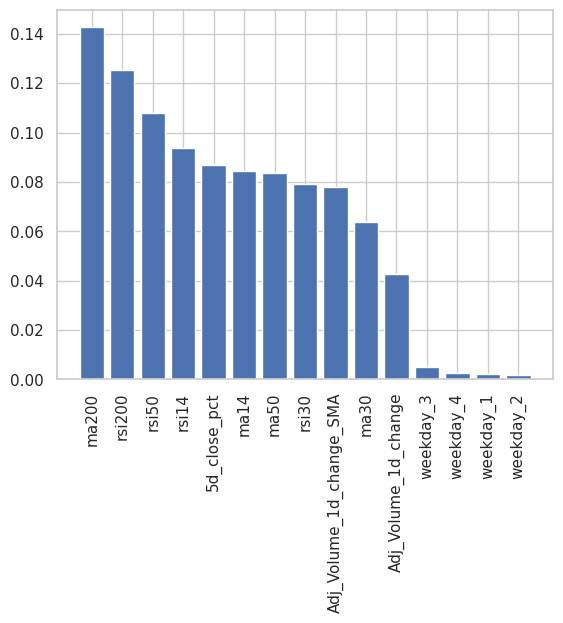

In [54]:
# Create tick labels
labels = np.array(feature_names)[sorted_index]

plt.bar(x, feature_importances[sorted_index], tick_label=labels)

# Set the tick lables to be the feature names, according to the sorted feature_idx
plt.xticks(rotation=90)
plt.show()

# Chap 3: Neural networks and KNN

We will learn how to normalize and scale data for use in KNN and neural network methods. Then we will learn how to use KNN and neural network regression to predict the future values of a stock's price (or any other regression problem).


* **Scaling data and KNN Regression**

* Standardizing data

* Optimize n_neighbors

* Evaluate KNN performance

* **Neural Networks**

* Build and fit a simple neural net

* Plot losses

* Measure performance

* **Custom loss functions**

* Custom loss function

* Fit neural net with custom loss function

* Visualize the results

* **Overfitting and ensembling**

* Combatting overfitting with dropout

* Ensembling models

* See how the ensemble performed


## Scaling data and KNN Regression


### Standardizing data

Some models, like K-nearest neighbors (KNN) & neural networks, work better with scaled data -- so we'll standardize our data.

We'll also remove unimportant variables (day of week), according to feature importances, by indexing the features DataFrames with `.iloc[]`. KNN uses distances to find similar points for predictions, so big features outweigh small ones. Scaling data fixes that.

sklearn's `scale()` will **standardize data**, which sets the **mean to 0** and **standard deviation to 1**. Ideally we'd want to use `StandardScaler` with `fit_transform()` on the training data, and `fit()` on the test data, but we are limited to 15 lines of code here.

Once we've scaled the data, we'll check that it worked by plotting histograms of the data.

#### Instructions

* Remove day of week features from train/test features using `.iloc` (day of week are the last 4 features).
* Standardize `train_features_3` and `test_features_3` using sklearn's `scale()`; store scaled features as `scaled_train_features` and `scaled_test_features`.
* Plot a histogram of the 14-day RSI moving average (indexed at `[:, 2]`) from unscaled `train_features` on the first subplot (`ax[0]`).
* Plot a histogram of the standardized 14-day RSI moving average on the second subplot (`ax[1]`).

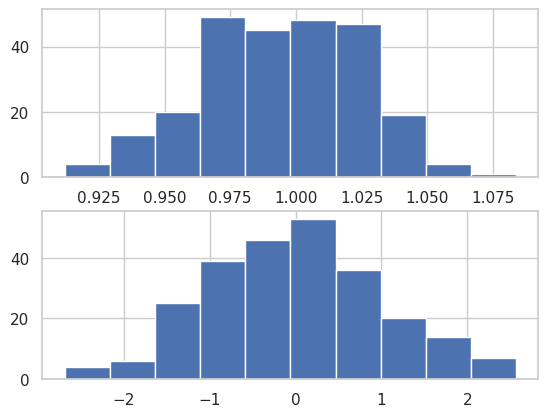

In [55]:
from sklearn.preprocessing import scale

# Remove unimportant features (weekdays)
train_features_3 = train_features_3.iloc[:, :-4]
test_features_3= test_features_3.iloc[:,:-4]

# Standardize the train and test features
scaled_train_features = scale(train_features_3)
scaled_test_features = scale(test_features_3)

# Plot histograms of the 14-day SMA RSI before and after scaling
f, ax = plt.subplots(nrows=2, ncols=1)
train_features.iloc[:, 2].hist(ax=ax[0])
ax[1].hist(scaled_train_features[:, 2])
plt.show()

Next we're going to optimize n_neighbors for improved performance.

### Optimize n_neighbors

Now that we have scaled data, we can try using a **KNN model**. To maximize performance, we should tune our model's hyperparameters. For the **k-nearest neighbors algorithm**, we only have **one hyperparameter: n**, the number of neighbors. We set this hyperparameter when we create the model with `KNeighborsRegressor`. The argument for the number of neighbors is `n_neighbors`.

We want to try a range of values that passes through the setting with the best performance. Usually we will start with 2 neighbors, and increase until our scoring metric starts to decrease. We'll use the `R2` value from the `.score()` method on the test set (`scaled_test_features` and `test_targets`) to optimize `n` here. We'll use the test set scores to determine the best `n`.

#### Instructions

* Loop through values of 2 to 12 for `n` and set this as `n_neighbors` in the knn model.
* Fit the model to the training data (`scaled_train_features` and `train_targets`).
* Print out the `R2` values using the `.score()` method of the knn model for the train and test sets, and take note of the best score on the test set.

In [56]:
from sklearn.neighbors import KNeighborsRegressor

for n in range(2,13):
    # Create and fit the KNN model
    knn = KNeighborsRegressor(n_neighbors=n)

    # Fit the model to the training data
    knn.fit(scaled_train_features, train_targets)

    # Print number of neighbors and the score to find the best value of n
    print("n_neighbors =", n)
    print('train, test scores')
    print(knn.score(scaled_train_features, train_targets))
    print(knn.score(scaled_test_features,test_targets))
    print()  # prints a blank line

n_neighbors = 2
train, test scores
0.7086590518110245
-0.2457051272374251

n_neighbors = 3
train, test scores
0.6161299695003466
-0.02824798752790114

n_neighbors = 4
train, test scores
0.5698590844708642
0.054069637288982064

n_neighbors = 5
train, test scores
0.5306669823361658
0.09562673296186885

n_neighbors = 6
train, test scores
0.4924157634083257
0.06493624818165344

n_neighbors = 7
train, test scores
0.4638477451246331
0.018590670460287284

n_neighbors = 8
train, test scores
0.4305841272960338
0.03430514088288383

n_neighbors = 9
train, test scores
0.39035273655318137
-0.054993685932298586

n_neighbors = 10
train, test scores
0.3585431044577594
-0.04569165134882858

n_neighbors = 11
train, test scores
0.3100220686973306
-0.08074815512838707

n_neighbors = 12
train, test scores
0.2742940406863563
-0.07302787030122504



See how 5 is the best number of neighbors based on the test scores.

### Evaluate KNN performance

We just saw a few things with our KNN scores.
* For one, the training scores started high and decreased with increasing n, which is typical.
* The test set performance reached a peak at 5 though, and we will use that as our setting in the final KNN model.

As we have done a few times now, we will check our performance visually. This helps us see how well the model is predicting on different regions of actual values. We will get predictions from our knn model using the `.predict()` method on our scaled features. Then we'll use matplotlib's `plt.scatter()` to create a scatter plot of actual versus predicted values.

#### Instructions

* Set `n_neighbors` in the `KNeighborsRegressor` to the best-performing value of 5 (found in the previous exercise).
* Obtain predictions using the knn model from the `scaled_train_features` and `scaled_test_features`.
* Create a scatter plot of the `test_targets` versus the `test_predictions` and label it test.


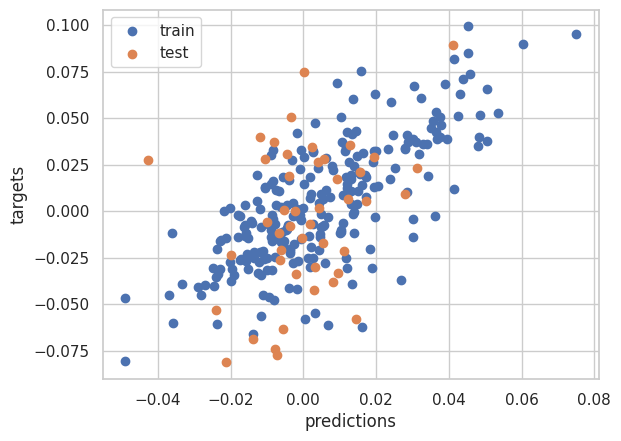

In [57]:
# Create the model with the best-performing n_neighbors of 5
knn = KNeighborsRegressor(n_neighbors=5)

# Fit the model
knn.fit(scaled_train_features, train_targets)

# Get predictions for train and test sets
train_predictions_knn = knn.predict(scaled_train_features)
test_predictions_knn = knn.predict(scaled_test_features)

# Plot the actual vs predicted values
plt.scatter(train_predictions_knn, train_targets, label='train')
plt.scatter(test_predictions_knn, test_targets, label='test')
plt.xlabel('predictions')
plt.ylabel('targets')
plt.legend()
plt.show()

the model is doing OK!

## Neural Networks

Neural networks have potential

Neural nets have:

* non-linearity
* variable interactions
* customizability

Use Keras library with the TensorFlow back-end to implement Neural networks
Keras is a high-level API that allows us to design neuraö nets with minimal code but allows a lot of customization

In Keras we can use the sequential or functionanal API.
We'll use the sequential now because it's simpler.

### Build and fit a simple neural net

The next model we will learn how to use is a neural network. Neural nets can capture complex interactions between variables, but are difficult to set up and understand. Recently, they have been beating human experts in many fields, including image recognition and gaming (check out AlphaGo) -- so they have great potential to perform well.

To build our nets we'll use the **keras library**. This is a high-level API that allows us to quickly make neural nets, yet still exercise a lot of control over the design.

The first thing we'll do is create almost the simplest net possible -- a 3-layer net that takes our inputs and predicts a single value. Much like the sklearn models, keras models have a `.fit()` method that takes arguments of (features, targets).

#### Instructions

* Create a dense layer with 20 nodes and the ReLU (`'relu'`) activation as the 2nd layer in the neural network.
* Create the last dense layer with 1 node and a linear activation (activation=`'linear'`).
* Fit the model to the `scaled_train_features` and `train_targets`.

In [58]:
from keras.models import Sequential
from keras.layers import Dense

# Create the model
model_1 = Sequential()
model_1.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(1, activation='linear'))

# Fit the model
model_1.compile(optimizer='adam', loss='mse')
history = model_1.fit(scaled_train_features, train_targets, epochs=25)

Epoch 1/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0171
Epoch 2/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0069 
Epoch 3/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0040 
Epoch 4/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0031 
Epoch 5/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0021 
Epoch 6/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0019 
Epoch 7/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0017 
Epoch 8/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0014 
Epoch 9/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0012 
Epoch 10/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.8751e-04 
Epoch 11/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0010 
Epoch 12/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.8445e-04 
Epoch 13/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.9074e-04
Epoch 14/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.2488e-04 
Epoch 15/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.9380e-04 
Epoch 16/25
8/8 

Now we need to check that our training loss has flattened out and the net is sufficiently trained.

### Plot losses

Once we've fit a model, we usually check the training loss curve to make sure it's flattened out. The history returned from model `.fit()` is a dictionary that has an entry, `'loss'`, which is the training loss. We want to ensure this has more or less flattened out at the end of our training.

#### Instructions

* Plot the losses (`'loss'`) from `history.history`.
* Set the title of the plot as the last loss from `history.history`, and round it to 6 digits.

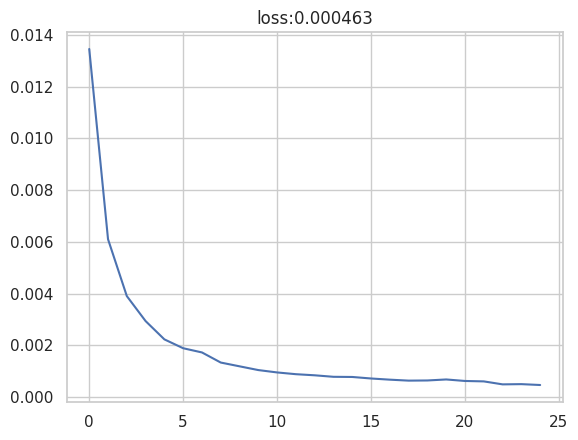

In [59]:
# Plot the losses from the fit
plt.plot(history.history['loss'])

# Use the last loss as the title
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

### Measure performance

Now that we've fit our neural net, let's check performance to see how well our model is predicting new values. **There's not a built-in `.score()` method** like with sklearn models, so we'll use the `r2_score()` function from `sklearn.metrics`. This calculates the R2 score given arguments (`y_true`, `y_predicted`). We'll also plot our predictions versus actual values again. This will yield some interesting results soon (once we implement our own custom loss function).

#### Instructions

* Obtain predictions from `model_1` on the scaled test set data (`scaled_test_features` and `test_targets`).
* Print the *R2 score* on the test set (`test_targets` and `test_preds`).
* Plot the `test_preds` versus `test_targets` in a scatter plot with `plt.scatter()`.

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
0.5724804050105202
-0.23550131246622708


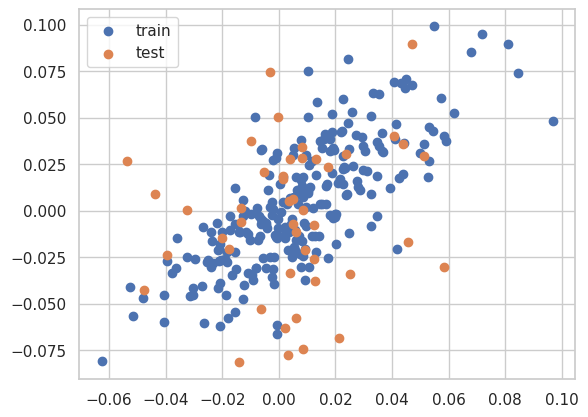

In [60]:
from sklearn.metrics import r2_score

# Calculate R^2 score
train_preds = model_1.predict(scaled_train_features)
test_preds = model_1.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Plot predictions vs actual
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds,test_targets, label='test')
plt.xlabel='predictions'
plt.ylabel='targets'
plt.legend()
plt.show()

 It doesn't look too much different from our other models at this point.

## Custom loss functions

When we create models, we ay have certains requirements
Custom loss function can help guide our neural nets towards meeting those needs
Direction is mportant for stock price change prediction

One way to guide our neural net to predict correct directionality is to apply penalty to incorrect prediciton direction

MSE with directional penalty

If prediction and target direction match:
Sum(y-^y)^2
If not
Sum(y-^y)^2`*`penalty

To be able to import our own custom loss we need the backend tensorflow. There are other bckends like Theano
Next, we create the actual loss function as a Python function

### Custom loss function

Up to now, we've used the **mean squared error as a loss function**. This works fine, but with stock price prediction it can be **useful to implement a custom loss function**. A custom loss function can help improve our model's performance in specific ways we choose. For example, **we're going to create a custom loss function with a large penalty for predicting price movements in the wrong direction**. This will help our net learn to at least predict price movements in the correct direction.

To do this, we need to write a function that takes arguments of (`y_true, y_predicted`). We'll also use functionality from the `backend keras` (using `tensorflow`) to find cases where the true value and prediction don't match signs, then penalize those cases.

#### Instructions

* Set the arguments of the `sign_penalty()` function to be `y_true` and `y_pred`.
* Multiply the squared error (`tf.square(y_true - y_pred)`) by `penalty` when the signs of `y_true` and `y_pred` are different.
* Return the average of the loss variable from the function -- this is the mean squared error (with our penalty for opposite signs of actual vs predictions).

`tf.math.less(
    x,
    y,
    name=None
)`


Returns the truth value of (x < y) element-wise.

`y_pred=1; y_true=-1`
`tf.less(y_pred*y_true,0)` en este caso dara **`True`** porque el producto sera -1>0
=> **True**

In [61]:
import keras.losses
import tensorflow as tf

# Create loss function
def sign_penalty(y_true, y_pred):
    penalty = 100.
    loss = tf.where(tf.less(y_true * y_pred, 0), \
                     penalty* tf.square(y_true - y_pred), \
                     tf.square(y_true - y_pred))

    return tf.reduce_mean(loss, axis=-1)

keras.losses.sign_penalty = sign_penalty  # enable use of loss with keras
print(keras.losses.sign_penalty)

<function sign_penalty at 0x7affe0677490>


### Fit neural net with custom loss function

Now we'll use the custom loss function we just created. This will enable us to alter the model's behavior in useful ways particular to our problem -- it's going to try to force the model to learn how to at least predict price movement direction correctly. All we need to do now is set the loss argument in our `.compile()` function to our function name, **`sign_penalty`**. We'll examine the training loss again to make sure it's flattened out.

#### Instructions

* Set the `input_dim` of the first neural network layer to be the number of columns of `scaled_train_features` with the `.shape[1]` property.
* Use the custom `sign_penalty` loss function to `.compile()` our `model_2`.
* Plot the `loss` from the `history` of the fit. The `loss` is under `history.history['loss']`.

Epoch 1/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 18.4429
Epoch 2/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7705 
Epoch 3/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2665 
Epoch 4/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8165 
Epoch 5/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6682 
Epoch 6/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4380 
Epoch 7/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2768 
Epoch 8/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2769 
Epoch 9/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2026 
Epoch 10/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1700 
Epoch 11/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1773 
Epoch 12/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1453 
Epoch 13/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1382 
Epoch 14/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1049 
Epoch 15/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1013 
Epoch 16/25
8/8 ━━━━━━━━━━━━━━━━━━

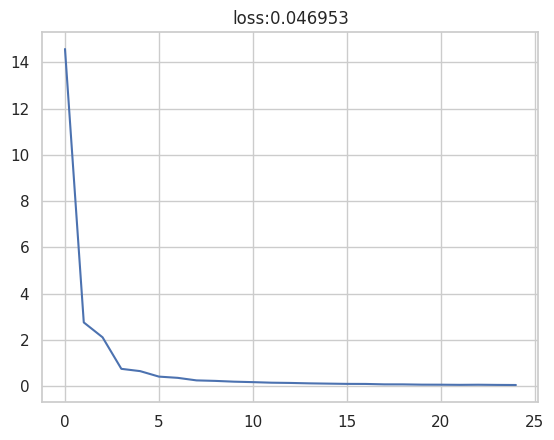

In [62]:
# Create the model
model_2 = Sequential()
model_2.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_2.add(Dense(20, activation='relu'))
model_2.add(Dense(1, activation='linear'))

# Fit the model with our custom 'sign_penalty' loss function
model_2.compile(optimizer='adam', loss=sign_penalty)
history = model_2.fit(scaled_train_features, train_targets, epochs=25)
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

### Visualize the results

We've fit our model with the custom loss function, and it's time to see how it is performing. We'll check the `R2 values` again with sklearn's `r2_score()` function, and we'll create a scatter plot of predictions versus actual values with `plt.scatter()`. This will yield some interesting results!

#### Instructions

* Create predictions on the test set with `.predict()`, `model_2`, and `scaled_test_features`.
* Evaluate the R2 score on the test set predictions using `test_preds` and `test_targets`.
* Plot the test set targets vs actual values with `plt.scatter()`, and label it `'test'`.


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
-0.5893486831982244
-0.8669316745158357


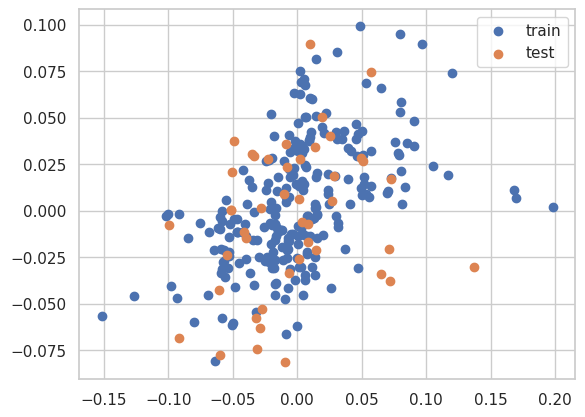

In [63]:
# Evaluate R^2 scores
train_preds = model_2.predict(scaled_train_features)
test_preds = model_2.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Scatter the predictions vs actual -- this one is interesting!
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label='test')  # plot test set
#plt.xlabel('predictions')
#plt.ylabel('targets')
plt.legend()
plt.show()

Notice how the train set actual vs predictions shape has changed to be a bow-tie.

## Overfitting and ensembling

Neural network options

**Options to combat overfitting**:

* Decrease number of nodes
* Use L1/L2 regulariation
* Dropout
* Autoencoder architecture
* Early stopping
* Adding noise to data
* Max norm constraints
* Ensembling

### Combatting overfitting with dropout

A common problem with neural networks is they tend to overfit to training data. What this means is the scoring metric, like R2 or accuracy, is high for the training set, but low for testing and validation sets, and the model is fitting to noise in the training data.

We can work towards preventing overfitting by using **dropout**. This randomly drops some neurons during the training phase, which helps prevent the net from fitting noise in the training data. keras has a `Dropout` layer that we can use to accomplish this. We need to set the **dropout rate**, or fraction of connections dropped during training time. This is set as a **decimal between 0 and 1** in the `Dropout()` layer.

We're going to go back to the mean squared error loss function for this model.

#### Instructions

* Add a dropout layer (`Dropout()`) after the first `Dense` layer in the model, and use 20% (0.2) as the dropout rate.
* Use the `adam` optimizer and the `mse` loss function when compiling the model in `.compile()`.
* Fit the model to the `scaled_train_features` and `train_targets` using 25 `epochs`.


Epoch 1/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2424
Epoch 2/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0593  
Epoch 3/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0452 
Epoch 4/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0307  
Epoch 5/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0197  
Epoch 6/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0253 
Epoch 7/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0185 
Epoch 8/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0131 
Epoch 9/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0095 
Epoch 10/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0152 
Epoch 11/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0077 
Epoch 12/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0067 
Epoch 13/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0089 
Epoch 14/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0066 
Epoch 15/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0065  
Epoch 16/25
8/8 ━━━━━━━━━━━━━━━

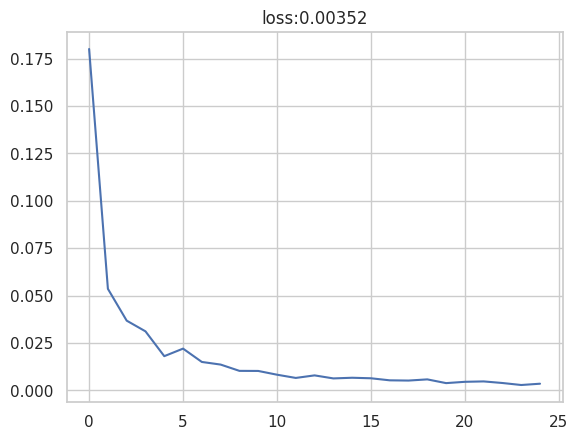

In [64]:
from keras.layers import Dropout

# Create model with dropout
model_3 = Sequential()
model_3.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(20, activation='relu'))
model_3.add(Dense(1, activation='linear'))

# Fit model with mean squared error loss function
model_3.compile(optimizer='adam', loss='mse')
history = model_3.fit(scaled_train_features, train_targets, epochs= 25)
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

### Ensembling models

One approach to improve predictions from machine learning models is **ensembling**. A **basic approach is to average the predictions from multiple models**. A more complex approach is to feed predictions of models into another model, which makes final predictions. Both approaches usually improve our overall performance (as long as our individual models are good). If you remember, **random forests are also using ensembling of many decision trees**.

To ensemble our neural net predictions, we'll make predictions with the 3 models we just created -- the basic model, the model with the custom loss function, and the model with dropout. Then we'll combine the predictions with numpy's `.hstack()` function, and average them across rows with `np.mean(predictions, axis=1)`.

#### Instructions

* Create predictions on the `scaled_train_features` and `scaled_test_features` for the 3 models we fit (`model_1`, `model_2`, `model_3`) using the `.predict()` method.
* Horizontally stack (`np.hstack(`) the predictions into a matrix, and take the row-wise averages to get average predictions for the train and test sets.


In [65]:
# Make predictions from the 3 neural net models
train_pred1 = model_1.predict(scaled_train_features)
test_pred1 = model_1.predict(scaled_test_features)

train_pred2 = model_2.predict(scaled_train_features)
test_pred2 =model_2.predict(scaled_test_features)

train_pred3 = model_3.predict(scaled_train_features)
test_pred3 = model_3.predict(scaled_test_features)

# Horizontally stack predictions and take the average across rows
train_preds = np.mean(np.hstack((train_pred1, train_pred2, train_pred3)), axis=1)
test_preds = np.mean(np.hstack((test_pred1, test_pred2, test_pred3)), axis=1)
print(test_preds[-5:])

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
[ 0.00207765  0.02096442  0.00942042 -0.02515957 -0.01837714]


### See how the ensemble performed

Let's check performance of our ensembled model to see how it's doing. We should see roughly an average of the R2 scores, as well as a scatter plot that is a mix of our previous models' predictions. The bow-tie shape from the custom loss function model should still be a bit visible, but the edges near x=0 should be softer.

#### Instructions

* Evaluate the R2 scores on the train and test sets. Use the sklearn `r2_score()` function (already imported for you) with `train_targets` and `train_preds` from the previous exercise.
*Plot the train and test predictions versus the actual values with `plt.scatter()`.

0.41636493385511253
-0.21201077386558786


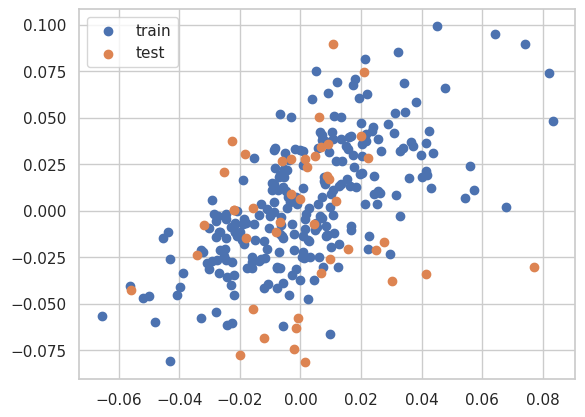

In [66]:
from sklearn.metrics import r2_score

# Evaluate the R^2 scores
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Scatter the predictions vs actual -- this one is interesting!
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label='test')
plt.legend(); plt.show()

# Chap 4: Machine learning with modern portfolio theory

In this chapter, you'll learn how to use modern portfolio theory (MPT) and the Sharpe ratio to plot and find optimal stock portfolios. You'll also use machine learning to predict the best portfolios. Finally, you'll evaluate performance of the ML-predicted portfolios.

olios.

* **Modern portfolio theory (MPT); efficient frontiers**

* Join stock DataFrames and calculate returns

* Calculate covariances for volatility

* Calculate portfolios

* Plot efficient frontier

* **Sharpe ratios; features and targets**

* Get best Sharpe ratios

* Calculate EWMAs

* Make features and targets

* Plot efficient frontier with best Sharpe ratio

* **Machine learning for MPT**

* Make predictions with a random forest

* Get predictions and first evaluation

* Evaluate returns

* Plot returns

* Closing remarks and advice

## Modern portfolio theory (MPT); efficient frontiers

* Joining data: concat()

* Calculating **Returns**

* Volatility

* BMS

* Covariance
* Dayly returns

* Efficient Frontier

### Join stock DataFrames and calculate returns

Our first step towards calculating **modern portfolio theory (MPT)** portfolios is to get daily and monthly returns. Eventually we're going to get the best portfolios of each month based on the **Sharpe ratio**.

The easiest way to do this is to put all our stock prices into one DataFrame, then to resample them to the daily and monthly time frames.

We need daily price changes to calculate **volatility**, which we will use as our measure of risk.

#### Instructions

* Join together `lng_df`, `spy_df`, and `smlv_df` using `pd.concat()` into the `full_df` DataFrame.
* Resample the `full_df` to **Business Month Start ('BMS') frequency**. http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases.

BMonthBegin or BusinessMonthBegin	'BMS'	business month begin

* Get the daily percent change of `full_df` with `.pct_change()`.


Make DatatimeIndex and remove the column of 'Adj_Volume'

In [67]:
for file_name in [lng_df,spy_df,smlv_df]:
    file_name['Date'] = pd.to_datetime(file_name['Date']).dt.date
    file_name.set_index('Date',inplace=True)
    file_name.index =pd.DatetimeIndex(file_name.index)
    file_name=file_name.drop(['Adj_Volume'], axis=1, inplace=True)

KeyError: 'Date'

In [68]:
print(lng_df.head())
print(spy_df.head())
print(smlv_df.head())

            Adj_Close  Adj_Volume  5d_future_close  5d_close_future_pct  \
Date                                                                      
2017-01-31      47.65   2137394.0            47.81             0.003358   
2017-02-01      47.10   2051631.0            48.01             0.019321   
2017-02-02      49.33   3081369.0            49.19            -0.002838   
2017-02-03      49.43   4158130.0            48.93            -0.010115   
2017-02-06      48.50   2090909.0            48.14            -0.007423   

            5d_close_pct      ma14      rsi14      ma30      rsi30      ma50  \
Date                                                                           
2017-01-31      0.043812  0.950697  62.968946  0.918657  60.655749  0.895731   
2017-02-01     -0.023429  0.967486  60.156019  0.932427  59.159791  0.910110   
2017-02-02     -0.021618  0.932220  66.659314  0.895486  62.988478  0.873379   
2017-02-03      0.007336  0.938976  66.920059  0.899461  63.148741  0.8754

In [69]:
full_df=pd.concat([lng_df,spy_df,smlv_df], axis=1).dropna()
full_df.columns=['LNG', 'SPY', 'SMLV']
full_df.head()

ValueError: Length mismatch: Expected axis has 25 elements, new values have 3 elements

In [70]:
# Resample the full dataframe to monthly timeframe
monthly_df = full_df.resample('BMS').first()

# Calculate daily returns of stocks
returns_daily = full_df.pct_change()
print('Returns daily: ')
print(returns_monthly.tail())

# Calculate monthly returns of the stocks
returns_monthly = monthly_df.pct_change().dropna()
print('\n'+'Returns Monthly: ')
print(returns_monthly.tail())

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

### Calculate covariances for volatility

In MPT, we quantify **risk via volatility**. The math for calculating portfolio volatility is complex, and it requires daily returns covariances. We'll now loop through each month in the `returns_monthly` DataFrame, and **calculate the covariance of the daily returns**.

With pandas **datetime indices**, we can access the month and year with `df.index.month` and `df.index.year`.

We'll use this to **create a `mask`** for `returns_daily` that **gives us the daily returns for the current month and year in the loop**.

We then use the mask to subset the DataFrame like this: `df[mask]`. This gets entries in the `returns_daily` DataFrame which are in the current month and year in each cycle of the loop.

Finally, we'll use pandas' `.cov()` method to get the covariance of daily returns.

#### Instructions

* Loop through the index of `returns_monthly`.
* Create a `mask` for `returns_daily` which uses the current `month` and `year` from `returns_monthly`, and matches this to the current month and year from i in the loop.
* Use the `mask` on `returns_daily` and calculate covariances using `.cov()`.

In [71]:
# Daily covariance of stocks (for each monthly period)
covariances = {}
rtd_idx = returns_daily.index
for i in returns_monthly.index:
    # Mask daily returns for each month and year, and calculate covariance
    mask = (rtd_idx.month == i.month) & (rtd_idx.year == i.year)

    # Use the mask to get daily returns for the current month and year of monthy returns index
    covariances[i] = returns_daily[mask].cov()

print(covariances[i])

NameError: name 'returns_daily' is not defined

### Calculate portfolios

We'll now generate portfolios to find each month's best one. numpy's `random.random()` generates random numbers from a uniform distribution, then we normalize them so they sum to 1 using the /= operator.

`x /= 3` is equivalent to:
`x = x / 3`

We use these weights to calculate **returns and volatility**.

* **Returns** are sums of weights times individual returns.

* **Volatility** is more complex, and involves the covariances of the different stocks.

Finally we'll store the values in dictionaries for later use, with months' dates as keys.

In this case, we will only generate 10 portfolios for each date so the code will run faster, but in a real-world use-case you'd want to use more like 1000 to 5000 randomly-generated portfolios for a few stocks.

#### Instructions

* Generate 3 random numbers for the weights using `np.random.random()`.
* Calculate returns by taking the dot product (`np.dot()`; multiplies element-by-element and sums up two arrays) of weights with the monthly returns for the current date in the loop.
* Use the `.setdefault()` method to add an empty list (`[]`) to the `portfolio_weights` dictionary for the current date, then append weights to the list.

In [72]:
portfolio_returns, portfolio_volatility, portfolio_weights = {}, {}, {}

# Get portfolio performances at each month
for date in sorted(covariances.keys()):
    cov = covariances[date]
    for portfolio in range(1000):
        weights = np.random.random(3)
        weights /= np.sum(weights) # /= divides weights by their sum to normalize
        returns = np.dot(weights, returns_monthly.loc[date])
        volatility = np.sqrt(np.dot(weights.T, np.dot(cov, weights)))
        portfolio_returns.setdefault(date, []).append(returns)
        portfolio_volatility.setdefault(date, []).append(volatility)
        portfolio_weights.setdefault(date, []).append(weights)

print(portfolio_weights[date][0])

NameError: name 'date' is not defined

### Plot efficient frontier

We can finally plot the results of our MPT portfolios, which shows the **"efficient frontier"**.

**This is a plot of the volatility vs the returns**.

This can help us visualize our risk-return possibilities for portfolios. The upper left boundary of the points is the best we can do (highest return for a given risk), and that is the efficient frontier.

To create this plot, we will use the latest date in our covariances dictionary which we created a few exercises ago. This has dates as keys, so we'll get the sorted keys using `sorted()` and `.keys()`, then get the last entry with Python indexing (`[-1]`). Lastly we'll use `matplotlib` to scatter variance vs returns and see the efficient frontier for the latest date in the data.

#### Instructions
* Get the latest date from the covariances dictionary -- remember the dates are the keys.
* Plot the volatility vs returns (`portfolio_returns`) for the latest date in a scatter plot, and set the `alpha` value for transparency to be `0.1`.

In [73]:
# Get latest date of available data
date = sorted(covariances.keys())[-1]

# Plot efficient frontier
# warning: this can take at least 10s for the plot to execute...
plt.scatter(x=portfolio_volatility[date], y=portfolio_returns[date],  alpha=0.1)
plt.xlabel('Volatility')
plt.xlim(0.008,0.02)
plt.ylim(-0.035,0.025)
plt.ylabel('Returns')
plt.show()

IndexError: list index out of range

## Sharpe ratios; features and targets

$$Sharpe\;ratio=\frac{portfolio\;return-risk\;free\;return}{portfolio\;standard\;deviation}$$

### Get best Sharpe ratios

We need to find the "ideal" portfolios for each date so we can use them as targets for machine learning.

We'll loop through each date in portfolio_returns, then loop through the portfolios we generated with `portfolio_returns[date]`.

We'll then calculate the **Sharpe ratio**, which is the return divided by volatility (assuming a no-risk return of 0).

We use `enumerate()` to loop through the returns for the current date (`portfolio_returns[date]`) and keep track of the `index` with `i`. Then we use the current date and current index to get the volatility of each portfolio with `portfolio_volatility[date][i]`.

Finally, we get the index of the best Sharpe ratio for each date using `np.argmax()`. We'll use this index to get the ideal portfolio weights soon.

### Instructions

* Using `enumerate()`, enumerate the `portfolio_returns` for each date in the loop.
* For the current date in the loop, append to the `sharpe_ratio` dictionary entry with the return (`ret`) divided by `portfolio_volatility` for the current date and current `i` in the loops.
* Set the value for the current date's `max_sharpe_idxs` to be the index of the maximum Sharpe ratio using `np.argmax()`.

In [74]:
# Empty dictionaries for sharpe ratios and best sharpe indexes by date
sharpe_ratio, max_sharpe_idxs = {}, {}

# Loop through dates and get sharpe ratio for each portfolio
for date in portfolio_returns.keys():
    for i, ret in enumerate(portfolio_returns[date]):

        # Divide returns by the volatility for the date and index, i
        sharpe_ratio.setdefault(date, []).append(ret/ portfolio_volatility[date][i])

    # Get the index of the best sharpe ratio for each date
    max_sharpe_idxs[date] = np.argmax(sharpe_ratio[date])

print(portfolio_returns[date][max_sharpe_idxs[date]])

NameError: name 'date' is not defined

We've got our best Sharpe ratios, which we'll use to create targets for machine learning.

### Calculate EWMAs
W
e will now work towards creating some features to be able to predict our ideal portfolios.

We will simply use the price movement as a feature for now.

To do this we will create a **daily exponentially-weighted moving average (EWMA)**, then resample that to the monthly timeframe.

Finally, we'll shift the monthly moving average of price one month in the future, so we can use it as a feature for predicting future portfolios.

#### Instructions

* Use a span of 30 to calculate the daily exponentially-weighted moving average (`ewma_daily`).
* Resample the daily `ewma` to the month by using the Business Monthly Start frequency (`BMS`) and the first day of the month (`.first()`).
* Shift `ewma_monthly` by one month forward, so we can use the previous month's EWMA as a feature to predict the next month's ideal portfolio.


In [75]:
# Calculate exponentially-weighted moving average of daily returns
ewma_daily = returns_daily.ewm(span=30).mean()

# Resample daily returns to first business day of the month with average for that month
ewma_monthly = ewma_daily.resample('BMS').first()

# Shift ewma for the month by 1 month forward so we can use it as a feature for future predictions
ewma_monthly = ewma_monthly.shift(1).dropna()

print(ewma_monthly.iloc[-1])

NameError: name 'returns_daily' is not defined

Now we can make our features and targets for a machine learning algorithm.

### Make features and targets

To use machine learning to pick the best portfolio, we need to generate features and targets. Our features were just created in the last exercise – the exponentially weighted moving averages of prices. Our targets will be the best portfolios we found from the highest Sharpe ratio.

We will use pandas' `.iterrows()` method to get the index, value pairs for the `ewma_monthly` DataFrame. We'll set the current value of `ewma_monthly` in the loop to be our features. Then we'll use the index of the best Sharpe ratio (from `max_sharpe_idxs`) to get the best `portfolio_weights` for each month and set that as a target.

#### Instructions

* Use the `.iterrows()` method with `ewma_monthly` to iterate through the index, value in the loop.
* Use the `date` in the loop and `best_idx` to index `portfolio_weights` to get the ideal portfolio weights based on the best Sharpe ratio.
* Append the `ewma` to the features.


In [76]:
targets, features = [], []

# Create features from price history and targets as ideal portfolio
for date, ewma in ewma_monthly.iterrows():

    # Get the index of the best sharpe ratio
    best_idx = max_sharpe_idxs[date]
    targets.append(portfolio_weights[date][best_idx])
    features.append(ewma)  # add ewma to features

targets = np.array(targets)
features = np.array(features)
print(targets[-5:])

NameError: name 'ewma_monthly' is not defined

We're ready for a machine learning model.

### Plot efficient frontier with best Sharpe ratio

Let's now plot the efficient frontier again, but add a marker for the portfolio with the best Sharpe index. Visualizing our data is always a good idea to better understand it.

Recall the efficient frontier is plotted in a scatter plot of portfolio volatility on the x-axis, and portfolio returns on the y-axis.

We'll get the latest date we have in our data from `covariances.keys()`, although any of the portfolio_returns, etc, dictionaries could be used as well to get the date.

Then we get volatilities and returns for the latest date we have from our `portfolio_volatility` and `portfolio_returns`.

Finally we get the index of the portfolio with the best Sharpe index from `max_sharpe_idxs[date]`, and plot everything with `plt.scatter()`.

#### Instructions

* Set cur_volatility to be the portfolio volatilities for the latest date.
* Construct the **"efficient frontier" plot** by plotting volatility on the x-axis and returns on the y-axis.
* Get the best portfolio index for the latest date from `max_sharpe_idxs`.

In [77]:
# Get most recent (current) returns and volatility
date = sorted(covariances.keys())[-1]
cur_returns = portfolio_returns[date]
cur_volatility = portfolio_volatility[date]

# Plot efficient frontier with sharpe as point
plt.scatter(x=cur_volatility, y=cur_returns, alpha=0.1, color='blue')
best_idx = max_sharpe_idxs[date]

# Place an orange "X" on the point with the best Sharpe ratio
plt.scatter(x=cur_volatility[best_idx], y=cur_returns[best_idx], marker='x', color='orange')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.xlim(0.008,0.02)
plt.ylim(-0.035,0.025)
plt.show()

IndexError: list index out of range

## Machine learning for MPT

### Make predictions with a random forest

In order to fit a machine learning model to predict ideal portfolios, we need to create train and test sets for evaluating performance. We will do this as we did in previous chapters, where we take our features and targets arrays, and split them based on a `train_size` we set. Often the train size may be around 70-90% of our data.

We then fit our model (a random forest in this case) to the training data, and evaluate the R2 scores on train and test using `.score()` from our model. In this case, the hyperparameters have been set for you, but usually you'd want to do a search with `ParameterGrid` like we did in previous chapters.

#### Instructions

* Set the `train_size` to be 85% of the full training set data using the `.shape` property of features.
* Create `train` and `test` targets from `targets` using Python indexing.
* Fit the random forest model to the `train_features` and `train_targets`.

In [78]:
# Make train and test features
train_size = int(0.85 * features.shape[0])
train_features = features[:train_size]
test_features = features[train_size:]
train_targets = targets[:train_size]
test_targets = targets[train_size:]

# Fit the model and check scores on train and test
rfr = RandomForestRegressor(n_estimators=300, random_state=42)
rfr.fit(train_features, train_targets)
print(rfr.score(train_features, train_targets))
print(rfr.score(test_features, test_targets))

AttributeError: 'list' object has no attribute 'shape'

The test score is not so good, but it'll work out OK in this case.

### Get predictions and first evaluation

Now that we have a trained random forest model (`rfr`), we want to use it to get predictions on the test set. We do this to evaluate our model's performance – at a basic level, is it doing as well or better than just buying the index, SPY?

We'll use the typical sklearn `.predict(features)` method, then multiply our monthly returns by our portfolio predictions. We sum these up with `np.sum()` since this will have 3 rows for each month. Then we plot both the monthly returns from our predictions, as well as SPY and compare the two.

#### Instructions

* Use the `rfr` random forest model's `.predict()` method to make predictions on `train_features` and `test_features`.
* Multiply the test set portion of returns_monthly by test_predictions to get the returns of our test set predictions.
* Plot the test set `returns_monthly` for `'SPY'` (everything from `train_size` to the end of the data).

In [79]:
# Get predictions from model on train and test
train_predictions = rfr.predict(train_features)
test_predictions = rfr.predict(test_features)
# Calculate and plot returns from our RF predictions and the SPY returns
test_returns = np.sum(returns_monthly.iloc[train_size:] * test_predictions, axis=1)
plt.plot(test_returns, label='algo')
plt.plot(returns_monthly['SPY'].iloc[train_size:], label='SPY')
plt.legend()
plt.show()

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- const
Feature names seen at fit time, yet now missing:
- Adj_Volume_1d_change
- Adj_Volume_1d_change_SMA
- weekday_1
- weekday_2
- weekday_3
- ...


We're doing a little better than SPY sometimes, and other times not. Let's see how it adds up.

### Evaluate returns

Let's now see how our portfolio selection would perform as compared with just investing in the SPY. We'll do this to see if our predictions are promising, despite the low R2 value.

We will set a starting value for our investment of $1000, then loop through the returns from our predictions as well as from SPY. We'll use the monthly returns from our portfolio selection and SPY and apply them to our starting cash balance. From this we will get a month-by-month picture of how our investment is doing, and we can see how our predictions did overall vs the SPY. Next, we can plot our portfolio from our predictions and compare it to SPY.

#### Instructions

* Set the first list entries of both `algo_cash` and `spy_cash` to the same amount (cash).
* Multiply the cash in our test_returns loop by `1 + r` in order to apply the returns to our cash.
* As with the `test_returns` loop, in the SPY performance loop, append cash to `spy_cash` after multiplying by `1 + r` to add the returns to cash.

In [80]:
# Calculate the effect of our portfolio selection on a hypothetical $1k investment
cash = 1000
algo_cash, spy_cash = [cash], [cash]  # set equal starting cash amounts
for r in test_returns:
    cash *= 1 + r
    algo_cash.append(cash)

# Calculate performance for SPY
cash = 1000  # reset cash amount
for r in returns_monthly['SPY'].iloc[train_size:]:
    cash *= 1 + r
    spy_cash.append(cash)
print('algo returns:', (algo_cash[-1] - algo_cash[0]) / algo_cash[0])
print('SPY returns:', (spy_cash[-1] - spy_cash[0]) / spy_cash[0])

NameError: name 'test_returns' is not defined

 Our predictions slightly beat the SPY!

### Plot returns
Lastly, we'll plot the performance of our machine-learning-generated portfolio versus just holding the SPY. We can use this as an evaluation to see if our predictions are doing well or not.

Since we already have `algo_cash` and `spy_cash` created, all we need to do is provide them to `plt.plot()` to display. We'll also set the label for the datasets with legend in `plt.plot()`.

#### Instructions

* Use `plt.plot()` to plot the `algo_cash` and `spy_cash`, labeling them `'algo'` and `'SPY'`.
* Use `plt.legend()` to display the legend.

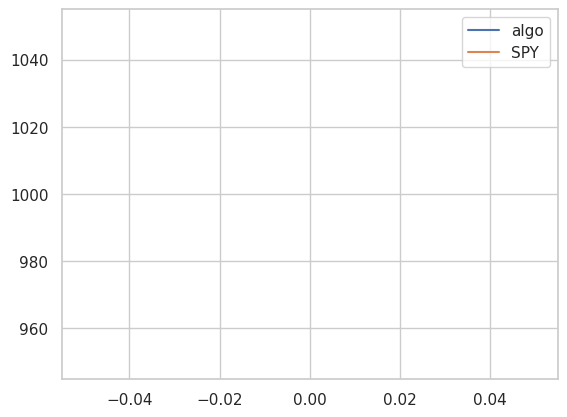

In [81]:
# Plot the algo_cash and spy_cash to compare overall returns
plt.plot(algo_cash, label='algo')
plt.plot(spy_cash, label='SPY')
plt.legend() # show the legend
plt.show()

You finished the last coding exercise!

### Toy examples

Tools for bigger data:

* Python 3 multiprocessing
* Dask
* Spark

#### Get more and better data
Data in this course:

* From Quandl.com/EOD (free subset available)

Alternative and other data:

* satellite images
* sentiment analysis (e.g. PsychSignal)
* analyst predictions
* fundamentals data


